<a href="https://colab.research.google.com/github/MWButlerMI/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**
---
Megan Butler


## Project Overview

This project will seek to create a prediction model for food items sold at a group of stores.

### Load and Inspect Data

In [ ]:
# Import required packages
import pandas as pd
import numpy as np
from statistics import mode
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save the folder + filename as a variable called fpath
fpath = "/content/drive/MyDrive/Coding Dojo/01-Fundamentals/Week02_Assign_Data/sales_predictions_2023.csv"
#load data as pandas dataframe
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Clean Data

In [ ]:
# Inspect object columns
newdf = df.select_dtypes(include='object')
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Item_Identifier       8523 non-null   object
 1   Item_Fat_Content      8523 non-null   object
 2   Item_Type             8523 non-null   object
 3   Outlet_Identifier     8523 non-null   object
 4   Outlet_Size           6113 non-null   object
 5   Outlet_Location_Type  8523 non-null   object
 6   Outlet_Type           8523 non-null   object
dtypes: object(7)
memory usage: 466.2+ KB


In [ ]:
# Number of rows and columns from shape (row, col)
df.shape

(8523, 12)

1) There are 8,523 rows and 12 columns in this dataset.

In [ ]:
# Check datatype
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

2) There are Object, Float, and Integer data types in the dataset.

In [ ]:
# Create filter to identiy duplicated rows
duplicated_rows = df.duplicated()
duplicated_rows
# Add up values in duplicated_rows filter for # number of dups
df.duplicated().sum()

0

3) There are no duplicate rows in the dataset.

In [ ]:
# Find number of unique values for each column
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
# Check to see if any columns have unique values
df.nunique() / len(df) * 100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

In [ ]:
# List of categorical column names
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Check category columns for null values
df[cat_cols].isna().sum()


Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

4) The Outlet Size column is missing values, 2,410 fields are null.

In [ ]:
# Fill Outlet_Size null values with MISSING
df['Outlet_Size'] = df['Outlet_Size'].fillna("MISSING")
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
          2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# Verify Outlet_Size null values resolved
df[cat_cols].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

6) There are no more missing categorical values.

In [ ]:
# List of numeric column names
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# Check numeric colums for null values
df[num_cols].isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

4) The Item Weight column is missing values, 1,463 fields contain null values.

In [ ]:
# Fill Item_Weight null values with -1
df['Item_Weight'] = df['Item_Weight'].fillna(-1)
df['Item_Weight'].value_counts(dropna=False)

-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [ ]:
# Verify all numeric column null values filled in
df[num_cols].isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

6) There are no more missing numeric values.

In [ ]:
# Saving list of object columns
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Checking nunique for object cols
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [ ]:
# In Item_Fat_Content replacing "LF" and "low fat" with "Low Fat", replacing "reg" with "Regular"
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':"Low Fat",'low fat':"Low Fat",'reg':"Regular"})
# Check the value counts again to confirm
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

7) In the Item Fat Content column, the fields with "LF" and "low fat" where replaced with "Low Fat" for consistency. The fields with "reg" where also replaced with "Regular" for consistency.

In [ ]:
# Finding the mean for column Item_Visibility
filter_age = df['Item_Visibility']
filter_age.mean()

0.06613202877895108

In [ ]:
# Finding the max for column Item_Visibility
filter_age = df['Item_Visibility']
filter_age.max()

0.328390948

In [ ]:
# Finding the min for column Item_Visibility
filter_age = df['Item_Visibility']
filter_age.min()

0.0

8) Item Visibility: mean=0.067, max=0.328, min=0.00

In [ ]:
# Finding the mean for column Item_Weight
filter_age = df['Item_Weight']
filter_age.mean()

10.478936407368296

In [ ]:
# Finding the max for column Item_Weight
filter_age = df['Item_Weight']
filter_age.max()

21.35

In [ ]:
# Finding the min for column Item_Weight
filter_age = df['Item_Weight']
filter_age.min()

-1.0

8) Item Weight: mean=10.48, max=21.35, min=-1.00

In [ ]:
# Finding the mean for column Item_MRP
filter_age = df['Item_MRP']
int(filter_age.mean())

140

In [ ]:
# Finding the max for column Item_MRP
filter_age = df['Item_MRP']
int(filter_age.max())

266

In [ ]:
# Finding the min for column Item_MRP
filter_age = df['Item_MRP']
int(filter_age.min())

31

8) Item MRP: mean=140, max=226, min=31

In [ ]:
# Finding the mean for column Outlet_Establishment_Year
filter_age = df['Outlet_Establishment_Year']
int(filter_age.mean())

1997

In [ ]:
# Finding the max for column Outlet_Establishment_Year
filter_age = df['Outlet_Establishment_Year']
int(filter_age.max())

2009

In [ ]:
# Finding the min for column Outlet_Establishment_Year
filter_age = df['Outlet_Establishment_Year']
int(filter_age.min())

1985

8) Outlet Establishment Year: mean=1997, max=2009, min=1985

In [ ]:
# Finding the mean for column Item_Outlet_Sales
filter_age = df['Item_Outlet_Sales']
int(filter_age.mean())

2181

In [ ]:
# Finding the max for column Item_Outlet_Sales
filter_age = df['Item_Outlet_Sales']
int(filter_age.max())

13086

In [ ]:
# Finding the min for column Item_Outlet_Sales
filter_age = df['Item_Outlet_Sales']
int(filter_age.min())

33

8) Item Outlet Sales: mean=2,181, max=13,086, min=33

In [ ]:
# Saving folder + filename as variable called fpath_out
fpath_out = "/content/drive/MyDrive/Coding Dojo/01-Fundamentals/Week02_Data/sales_pred_23_data_cleaned.cvs"
# Using to_csv to save dataframe using the filename
df.to_csv(fpath_out, index=True)

In [ ]:
# Reading cleaned .csv file
loaded = pd.read_csv(fpath_out)
# Checking info summary
loaded.info()
# Checking first 5 rows
loaded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8523 non-null   int64  
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                8523 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Exploratory Data Analysis

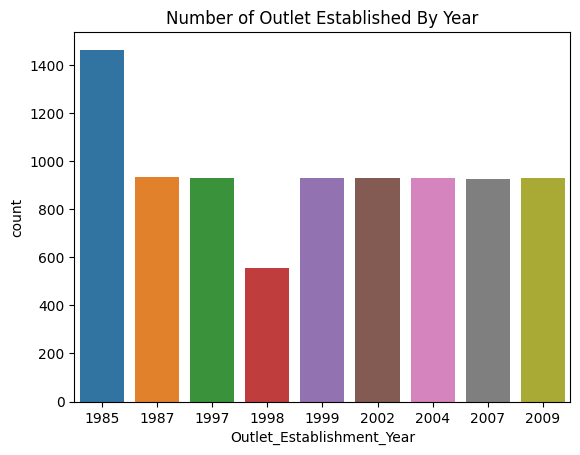

In [ ]:
# Ploting Outlet Established Year with a Countplot
ax = sns.countplot(x='Outlet_Establishment_Year', data=df)
ax.set_title("Number of Outlet Established By Year");

Text(0, 0.5, 'Number of Items')

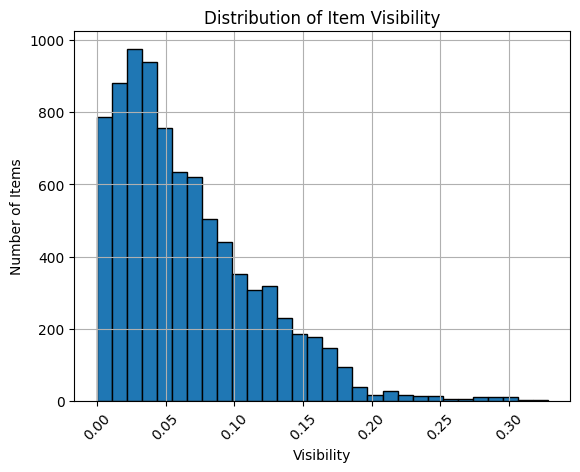

In [ ]:
# Ploting Histogram of Distribution of Item Sales
ax = df['Item_Visibility'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item Visibility')
ax.set_xlabel('Visibility')
ax.set_ylabel('Number of Items')

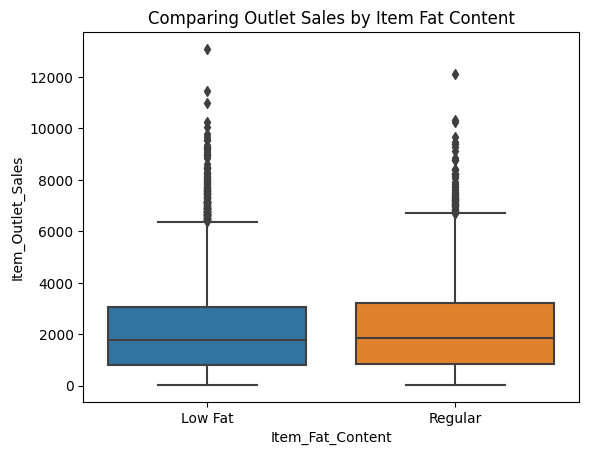

In [ ]:
# Ploting Boxplot of item types by outlet sales
ax = sns.boxplot(data=df, x='Item_Fat_Content', y="Item_Outlet_Sales")
ax.set_title("Comparing Outlet Sales by Item Fat Content");

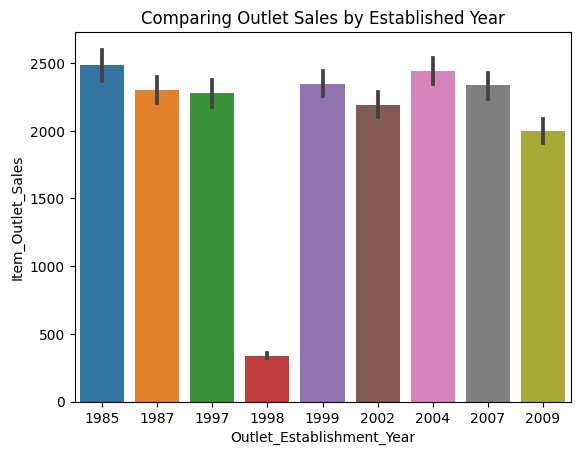

In [ ]:
# Ploting a Barplot of smoker vs charges - Seaborn
ax = sns.barplot(data=df, x='Outlet_Establishment_Year', y="Item_Outlet_Sales")
ax.set_title("Comparing Outlet Sales by Established Year");

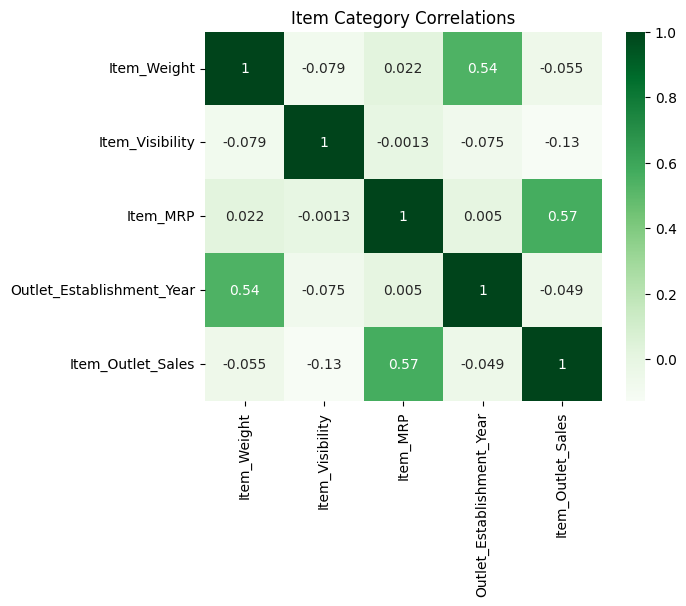

In [ ]:
# Correlation Heatmap of Item Categories
corr = df.corr(numeric_only = True)
corr.round(2)
ax = sns.heatmap(corr, cmap = 'Greens', annot = True);
ax.set_title("Item Category Correlations");

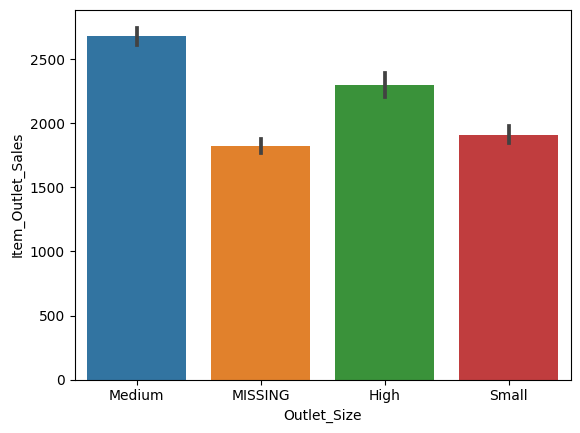

In [ ]:
# Ploting a Barplot of Outlet Size and Item Outlet Sales
sns.barplot(data=df, x='Outlet_Size', y="Item_Outlet_Sales")
plt.show()

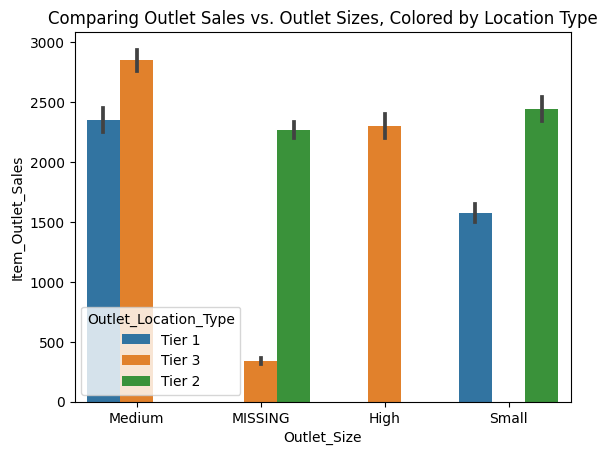

In [ ]:
# Ploting a barplot of Outlet Sales, Size, and Location Type
ax = sns.barplot(data=df, x="Outlet_Size", y="Item_Outlet_Sales", hue='Outlet_Location_Type')
ax.set_title("Comparing Outlet Sales vs. Outlet Sizes, Colored by Location Type");

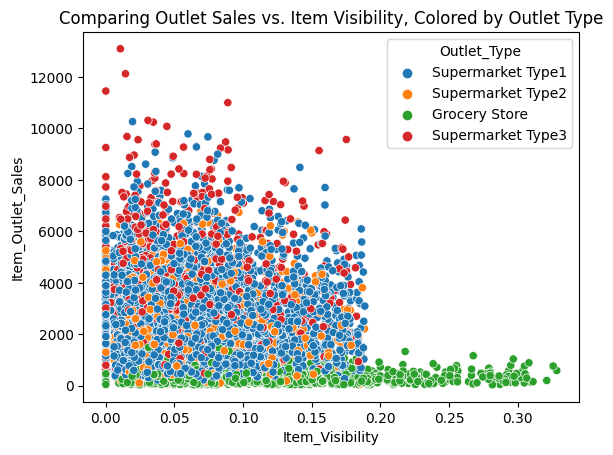

In [ ]:
# Ploting a Scatterplot of Sales vs Visibility, colored by Outlet Type
ax = sns.scatterplot(data=df, x="Item_Visibility", y="Item_Outlet_Sales", hue='Outlet_Type')
ax.set_title("Comparing Outlet Sales vs. Item Visibility, Colored by Outlet Type");

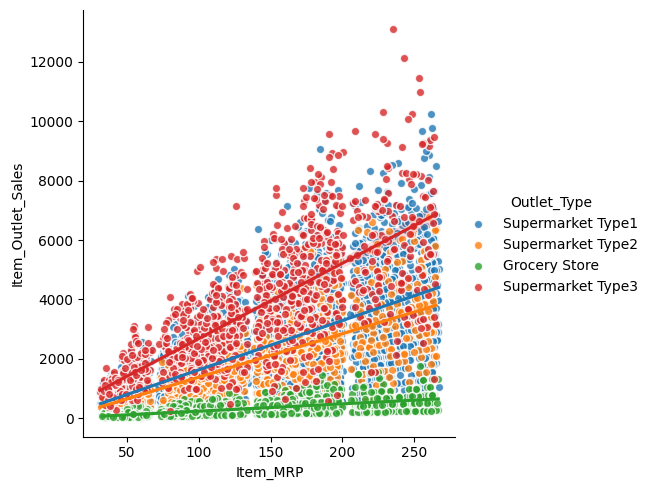

In [ ]:
#Ploting a lmplot of Outlet Sales vs. Item MRP, colored by Outlet Type.
scatter_kws = dict(edgecolor='white')
g = sns.lmplot(data=df, x="Item_MRP", y="Item_Outlet_Sales", scatter_kws=scatter_kws, hue="Outlet_Type");

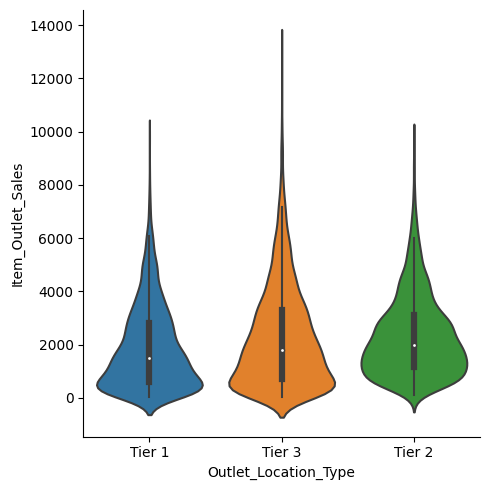

In [ ]:
# Ploting a violin plot with Catplot
g = sns.catplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Location_Type',
                kind='violin', dodge=False)

#### Explanatory Data Analysis

In [ ]:
# Replace Outlet_Size "MISSING" values with null ""
df['Outlet_Size'] = df['Outlet_Size'].replace('MISSING', np.nan)
# Check the value counts again to confirm
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# Replace Item_Weight -1 values with null ""
df['Item_Weight'] = df['Item_Weight'].replace(-1,np.nan)
# Check the value counts again to confirm
df['Item_Weight'].value_counts(dropna=False)

NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

Outlet Size missing values and Item Weight -1 values are converted back to null values for analysis.

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<Axes: >

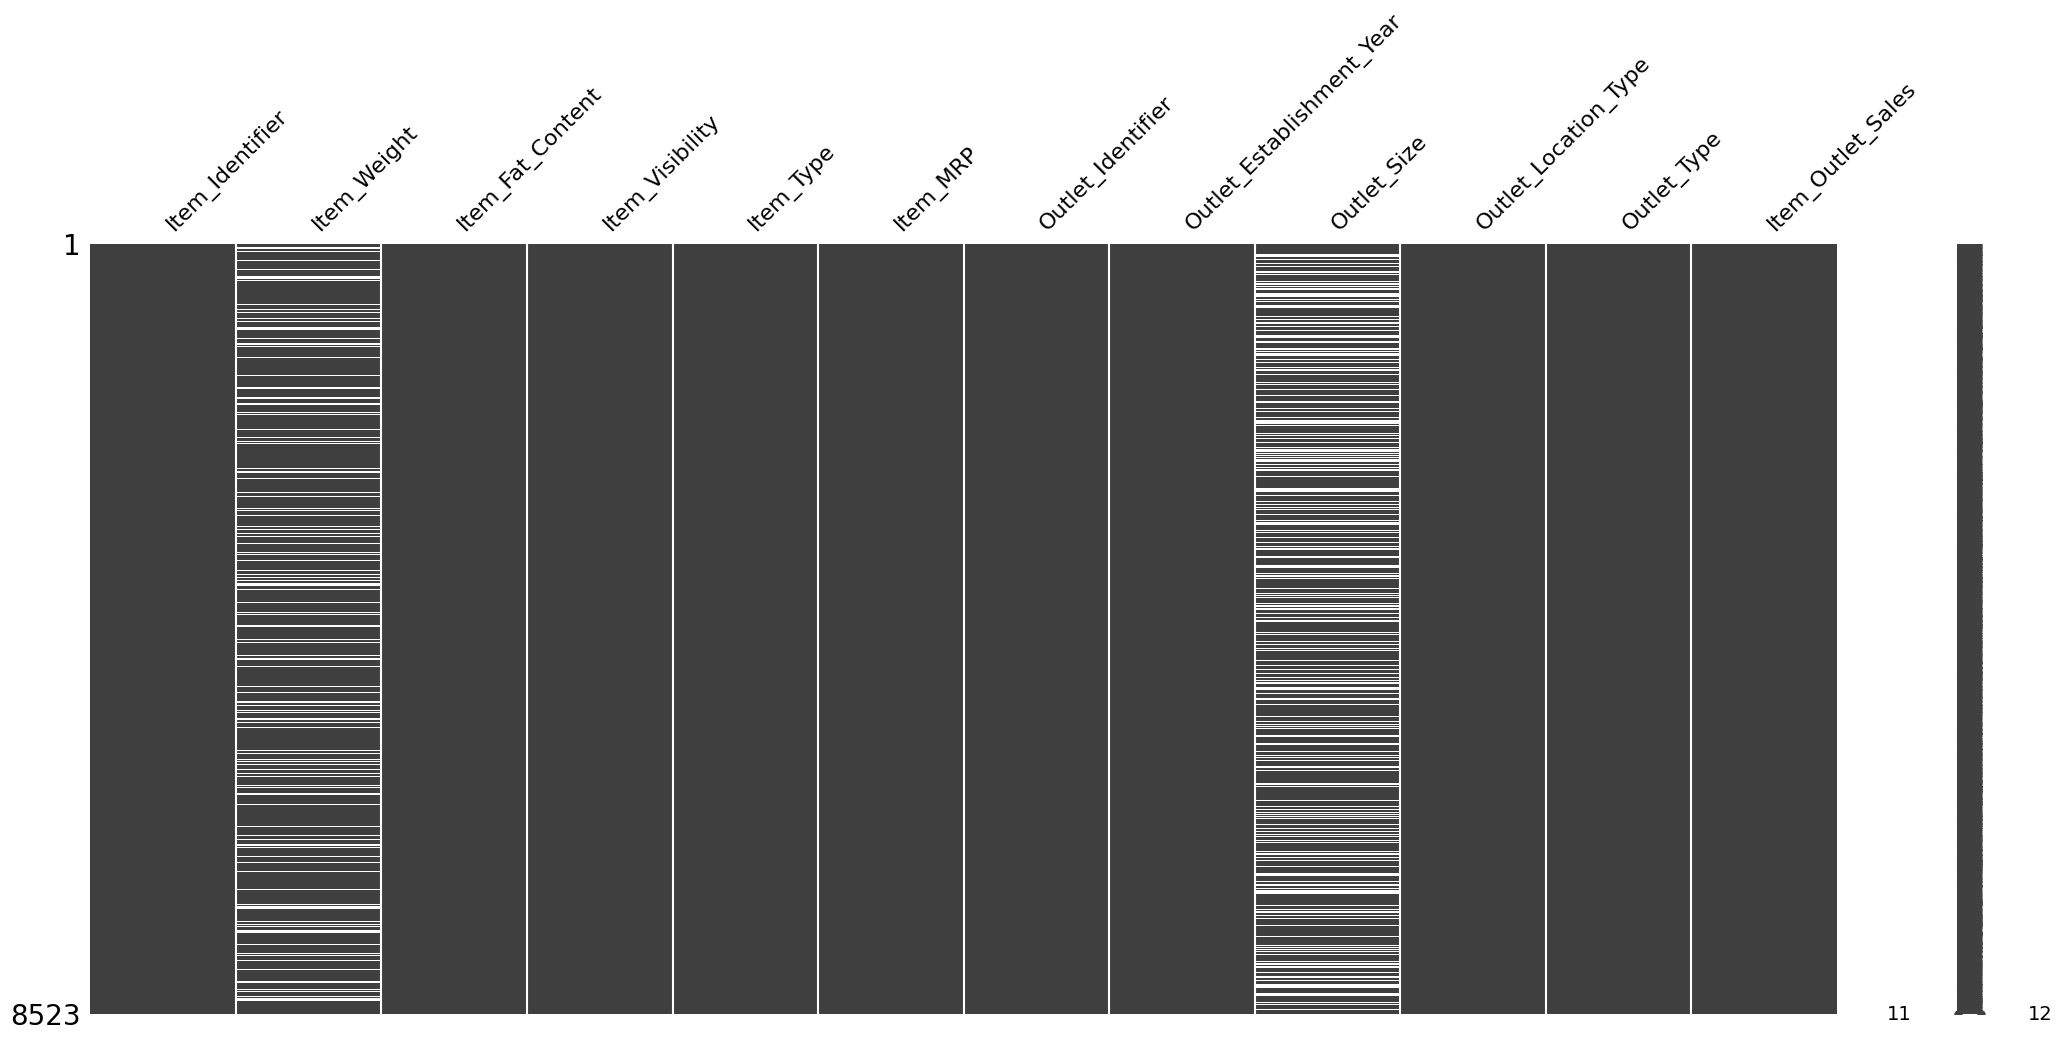

In [ ]:
msno.matrix(df)

Verified, null values are returned to the data set.

# Feature One: Item_Identifier - The Product ID.

Feature Inspection of Item Identifier. This feature is categorical with high cardinality and it does not offer any business value for shopper purchase prediction. It would be best to drop this feature from the model.

# Feature Two: Item_Weight - The weight of the product.

Feature Inspection of Item Weight. This feature is numeric but the food item's weight does not offer at lot of business value for purchase prediction. It would be best to drop this feature from the model.

# Feature Three: Item_Fat_Content	- Whether the product is low-fat or regular.

Feature Inspection of Item Fat Content. This feature is a categorical feature with two values, Low Fat or Regular. This feature may have business value in looking to see if shoppers are more likley to buy the healthier low fat version or not.

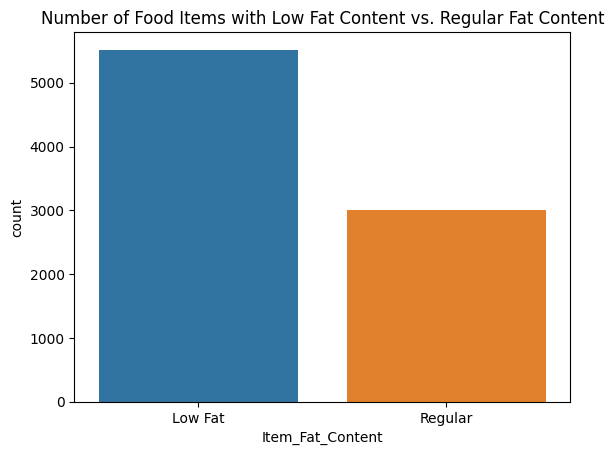

In [ ]:
# Graphing Item Fat Content
ax = sns.countplot(x='Item_Fat_Content', data=df)
ax.set_title("Number of Food Items with Low Fat Content vs. Regular Fat Content");

Text(0.5, 1.0, 'Comparing Item Sales by Item Fat Content')

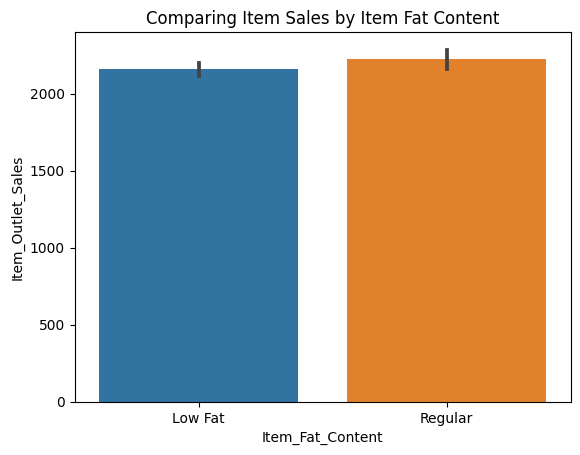

In [ ]:
# Comparing Item Fat Content and Item Outlet Sales
ax = sns.barplot(data=df, x="Item_Fat_Content", y="Item_Outlet_Sales")
ax.set_title("Comparing Item Sales by Item Fat Content")

# Feature Four: Item_Visibility	- The percentage of total display area of all products in a store allocated to the particular product.

Feature Inspection of Item Visibility. This feature is numerical and has high business value as it's a know industry fact that shoppers are more likely to purchase items at eye level over the items on the highest or lowest shelves. The exception being items which are marketed to children at their lower eye level.

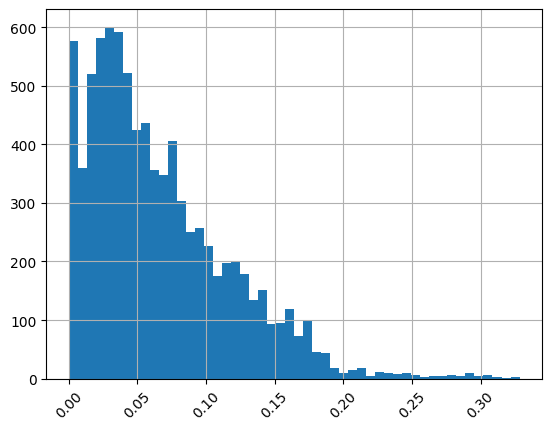

In [ ]:
# Graphing Item Visibility
ax = df['Item_Visibility'].hist(bins = 'auto')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')

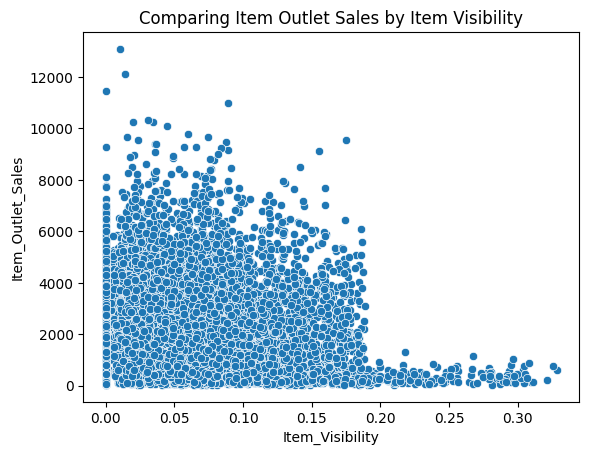

In [ ]:
# Graphing Item Outlet Sales and Item Visibility
ax = sns.scatterplot(data=df, x="Item_Visibility", y="Item_Outlet_Sales")
ax.set_title("Comparing Item Outlet Sales by Item Visibility");

# Feature Five: Item_Type	- The category to which the product belongs.

Feature Inspection of Item Type. This categorical feature has high cardinality with 16 different values. This item could add business value if it was grouped into ten or fewer higher level categories. In it's current format, it would be best to drop this feature from the prediction model.

# Feature Six: Item_MRP -	Maximum Retail Price (list price) of the product.

Feature Inspection of Item Maximum Retail Price (MRP). This numerical feature does have business value as it is a known industry fact that price impacts shopper's purchase decisions and should be explored further.

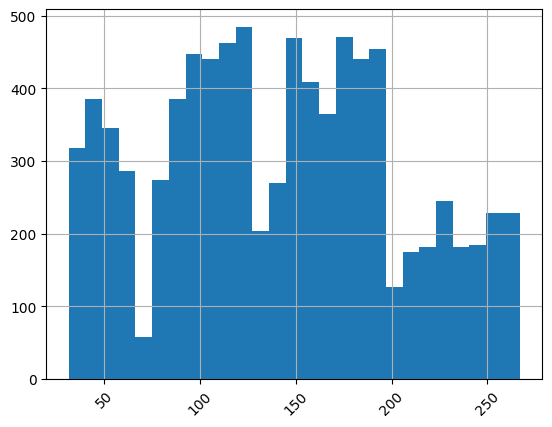

In [ ]:
# Graphing Item MRP
ax = df['Item_MRP'].hist(bins = 'auto')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')

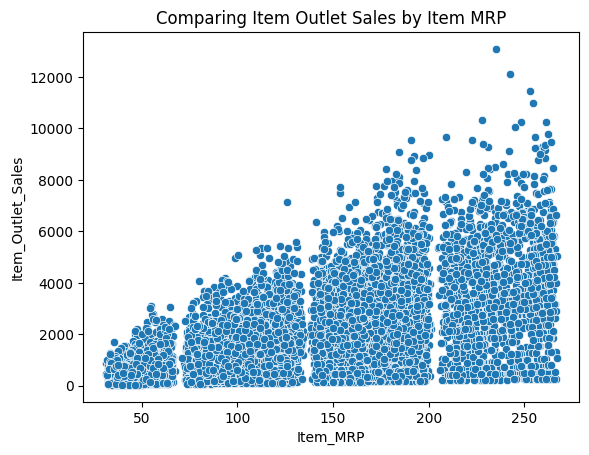

In [ ]:
# Graphing Item Outlet Sales and Item MRP
ax = sns.scatterplot(data=df, x="Item_MRP", y="Item_Outlet_Sales")
ax.set_title("Comparing Item Outlet Sales by Item MRP");

# Feature Seven: Outlet_Identifier - The Store ID.

Feature Inspection of Outlet Identifier. This feature is categorical with high cardinality and it does not offer any business value for shopper purchase prediction. It would be best to drop this feature from the model.

# Feature Eight: Outlet_Establishment_Year - The year in which store was established.

Feature Inspection of Outlet Establishment Year. This is a categorical feature and could have business value in determining if shoppers prefer newer stores.

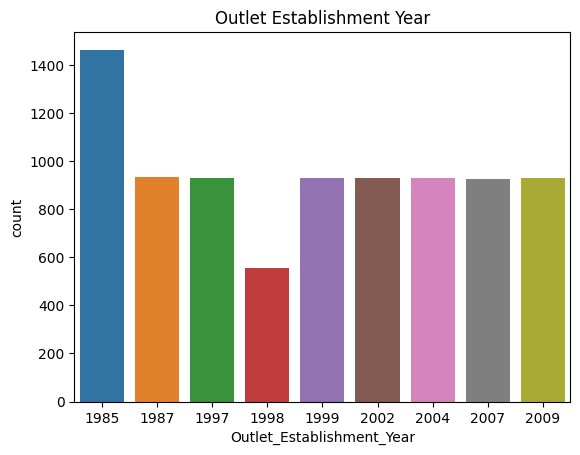

In [ ]:
# Graphing Outlet Est. Year
ax = sns.countplot(x='Outlet_Establishment_Year', data=df)
ax.set_title("Outlet Establishment Year");

Text(0.5, 1.0, 'Comparing Item Outlet Sales by Outlet Est. Year')

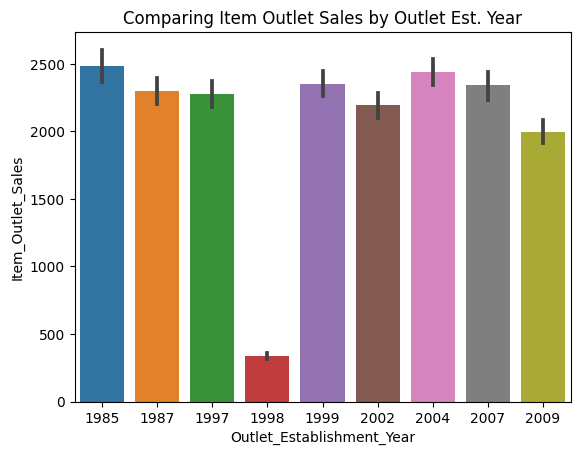

In [ ]:
# Comparing Outlet Est. Year and Item Outlet Sales
ax = sns.barplot(data=df, x="Outlet_Establishment_Year", y="Item_Outlet_Sales")
ax.set_title("Comparing Item Outlet Sales by Outlet Est. Year")

# Feature Nine: Outlet_Size	- The size of the store in terms of ground area covered.

Feature Inspection of Outlet Size. This a categorical feature with three values. This feature could have business value in determining if shoppers prefer smaller or larger stores. This feature does have null values but not enough to degregate the value and drop the feature. The null values can be replaced with a placeholder and filtered out of the graphs at a future analysis step.

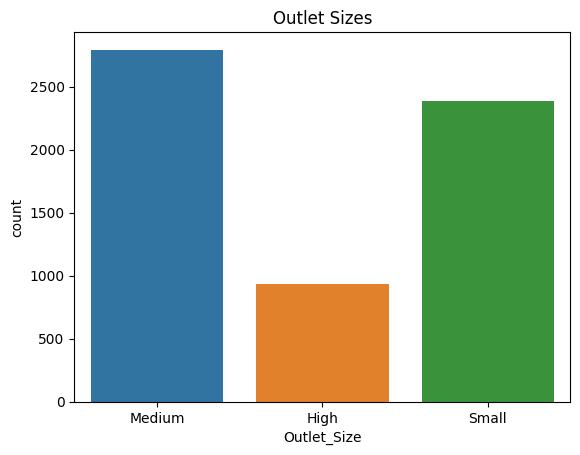

In [ ]:
# Graphing Outlet Size
ax = sns.countplot(x='Outlet_Size', data=df)
ax.set_title("Outlet Sizes");

Text(0.5, 1.0, 'Comparing Item Outlet Sales by Outlet Sizes')

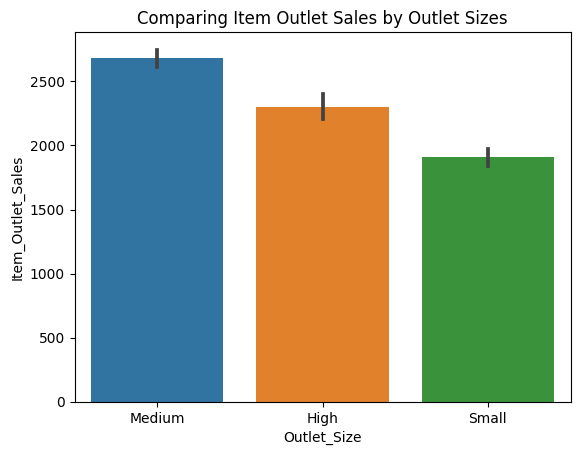

In [ ]:
# Comparing Outlet Sizes and Item Outlet Sales
ax = sns.barplot(data=df, x="Outlet_Size", y="Item_Outlet_Sales")
ax.set_title("Comparing Item Outlet Sales by Outlet Sizes")

# Feature Ten: Outlet_Location_Type	- The type of area in which the store is located.

Feature Inspection of Outlet Location Type. This a categorical feature with three values. This feature could have business value in determining if shoppers prefer shopping in certain types of areas over others.

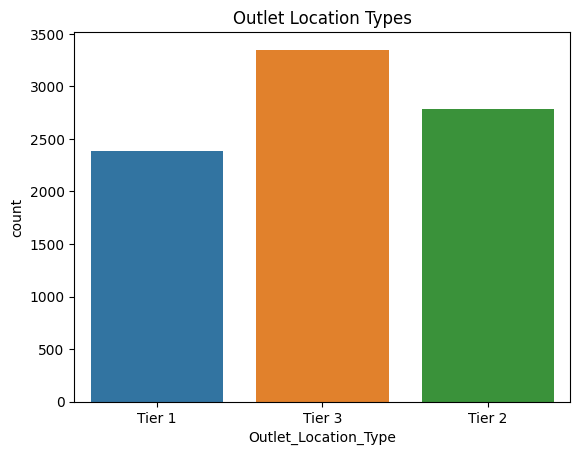

In [ ]:
# Graphing Outlet Location Type
ax = sns.countplot(x='Outlet_Location_Type', data=df)
ax.set_title("Outlet Location Types");

Text(0.5, 1.0, 'Comparing Item Outlet Sales by Outlet Location')

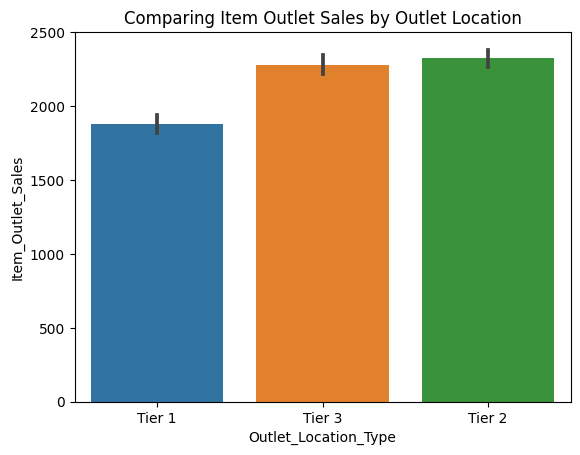

In [ ]:
# Comparing Outlet Location and Item Outlet Sales
ax = sns.barplot(data=df, x="Outlet_Location_Type", y="Item_Outlet_Sales")
ax.set_title("Comparing Item Outlet Sales by Outlet Location")

# Feature Eleven: Outlet_Type	- Whether the outlet is a grocery store or some sort of supermarket.

Feature Inspection of Outlet Type. This a categorical feature with four values. This feature could have business value in determining if shoppers prefer a grocery store, or one of the three supermarket types.

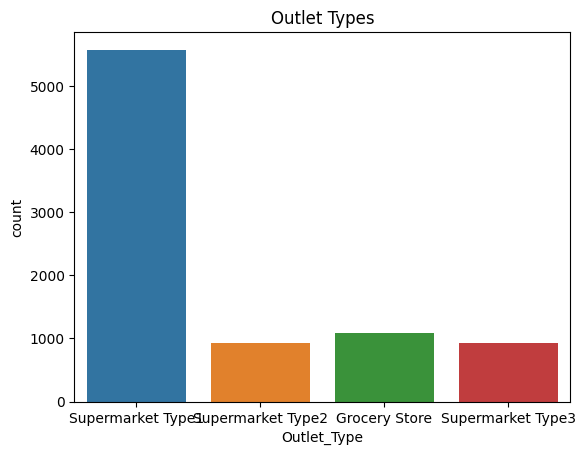

In [ ]:
# Graphing Outlet Types
ax = sns.countplot(x='Outlet_Type', data=df)
ax.set_title("Outlet Types");

Text(0.5, 1.0, 'Comparing Item Outlet Sales by Outlet Type')

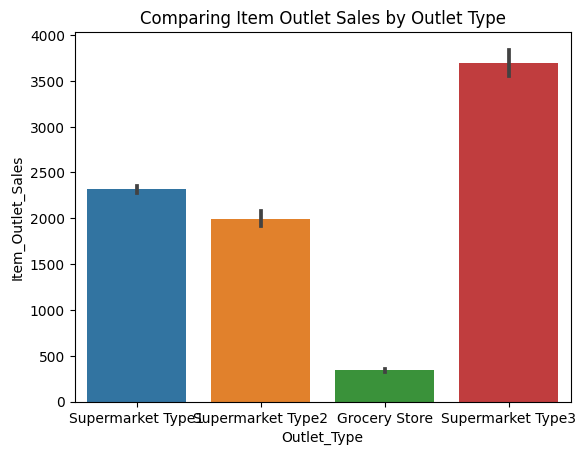

In [ ]:
# Comparing Outlet_Type and Item Outlet Sales
ax = sns.barplot(data=df, x="Outlet_Type", y="Item_Outlet_Sales")
ax.set_title("Comparing Item Outlet Sales by Outlet Type")

# Feature Twelve: Item_Outlet_Sales	- Sales of the product in the particular store. This is the target variable to be predicted.

Feature Inspection of Item Outlet Sales. This numerical feature is a data point that we wouldn't know in the future and thus does not provide business value for a prediction model. This feature should be dropped.